<a href="https://colab.research.google.com/github/Mhz95/Arabic-Text-Classification/blob/main/Arabic_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Importing Data Splitting Libs
from sklearn.model_selection import train_test_split
# Importing Classifiers Libs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Importing Feature Selection Libs
from sklearn.feature_selection import mutual_info_classif
# Importing Evaluation Metrics Libs
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Linking with Google drive
from google.colab import drive
drive.mount("/content/drive")
AI_Dataset = '/content/drive/My Drive/AI_Dataset' 

# Reading Dataset from CSV
dataset = pd.read_csv(AI_Dataset + "/" + "matrix_AI.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview

In [2]:
dataset

,words,اصل,مبيع,ارتفع,يشغل,عرب,مماثل,احق,انشاء,محاسب,توزيع,جديد,ضرور,جدة,خصوص,مال,ربع,احد,نصاب,سعود,لاعضاء,نتايج,مركز,متطلبا,رقم,سنو,بان,ادار,تعديل,حاضر,اخر,مذكور,مسا,ساد,والخمس,وذل,موافق,سهم,منته,اعمال,...,اضاف,اسم,قايم,COVID,تدعو,مهام,عضو,السن,احتراز,جمع,وانخفاض,ابراء,حساب,شخص,قيم,لارتفاع,تابع,نقد,لانعقاد,مكان,مرتبط,عزيز,ربح,واصدار,عام,نامل,بنك,والتكاليف,ضريب,مرشح,دايم,ماد,اثن,تاثير,صاف,عاد,جراء,تصويت,حال,class
0,1609648876,0,0,0,0,5,0,0,0,0,0,3,0,0,0,7,0,1,0,2,0,0,0,0,3,0,0,13,0,0,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,0,0,18,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1,1608098558,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1607922012,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,3,0,0,0,0,2,10,0,2,0,0,0,1,0,0,6,0,0,1,...,0,0,0,0,0,2,0,0,0,9,0,0,0,0,0,0,0,0,0,1,0,3,0,0,9,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0
3,1607403607,0,0,0,0,2,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,...,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,8,2,0
4,1606107614,0,0,0,0,1,0,0,2,0,0,2,0,0,0,3,1,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1189404052,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
256,1186489933,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
257,1184159971,3,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,1
258,1184048062,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1


In [3]:
# To create features array
data = dataset.iloc[:, 1:158] # To skip first column & last column (Class)
features = data.values # Only rows without headers (features names)
len(features[0])

157

In [4]:
# To create labels array
y = dataset['class'].values # values of the last column (Class column)
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

## Features Selection

In [5]:
# Top 15 frequent words 
# I remove irrelevant documents that are not listed in the assignment 3, hence the top frequency is 1699 instead of 1969
sum_column = data.sum(axis=0)
df = pd.DataFrame(sum_column,columns=['count'])
sorted_wf = df.sort_values(by=['count'], ascending=False)
sorted_wf[:15]

,count
شرك,1699
عام,936
مال,799
عرب,596
ادار,591
مجلس,584
ربع,554
جمع,551
مساهم,541
موافق,489


In [6]:
# Before removing:
# print(data['شرك'].sum())
features_df = data.drop(['شرك','عام','مال','عرب','ادار','مجلس','جمع','مساهم','ربع'], axis = 1) # Drop these columns
# After removing:
# features_df['شرك'] <- removed
features = features_df.values 
len(features[0])

148

In [7]:
# Splitting the data randomly, keep 1/4 as test set
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=1000)
print(len(X_train))
print(len(X_test))

195
65


### Zipf's law

In a corpus (e.g., list of documents) of a language (e.g., Arabic), the frequency of a word tends to be inversely proportional to its rank in the global list of words sorted by decreasing frequency. 

This trait is captured by [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), formulated by American linguist [George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf). 

Let $n$ be the number words in a corpus. For a fixed exponent $s > 0$ (usually close to $1$), Zipf's law estimates that the frequency of the $k$-th most frequent word is approximated by

$$
f(k) = \frac{(1/k^s)}{ \sum_{i=1}^n (1 / i^s)}
$$

The implementation and the above description of Zipf's law are forked from this [notebook](https://colab.research.google.com/drive/1sp0naldyyKaanJTrW_dldKu-gOFyZ1dA?pli=1#scrollTo=n3T3Wxw3vaJy) with some modifications. 

In [8]:
# Calculate the Zipf values for a given frequency array (sorted in decreasing order)
# and exponent.

def zipf(n, s):
   rank = np.arange(1, n+1)
   zipf = (1/rank**s)/(np.sum(1/(rank**s)))
   return zipf

# Words
words = sorted_wf.index
# Counts in a numpy array
counts = np.array(sorted_wf.iloc[:, 0]).astype(np.int64)
# Total number of words
N = np.sum(counts)
# Unique words
n = len(counts)
# Frequencies
freq = counts / N
# Exponent
s = 1
# Get zipf estimate
zipf = zipf(n,s)

In [9]:
dataZipf = pd.DataFrame(data={
     'rank': np.arange(1,n+1),
     'word': words, 
     'freq': freq, 
     'zipf': zipf,
     'count': counts,
     'zipf_count_estimate': zipf * N
})
dataZipf.head(20)

,rank,word,freq,zipf,count,zipf_count_estimate
0,1,شرك,0.071393,0.177411,1699,4222.016692
1,2,عام,0.039331,0.088705,936,2111.008346
2,3,مال,0.033574,0.059137,799,1407.338897
3,4,عرب,0.025044,0.044353,596,1055.504173
4,5,ادار,0.024834,0.035482,591,844.403338
5,6,مجلس,0.024540,0.029568,584,703.669449
6,7,ربع,0.023279,0.025344,554,603.145242
7,8,جمع,0.023153,0.022176,551,527.752086
8,9,مساهم,0.022733,0.019712,541,469.112966
9,10,موافق,0.020548,0.017741,489,422.201669


[None, None, Text(0.5, 1.0, 's= 1.00')]

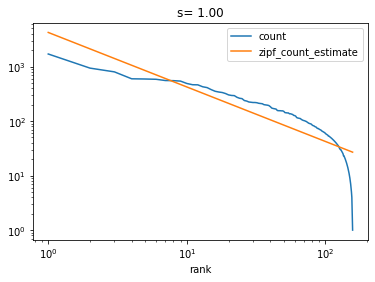

In [10]:
ax = dataZipf[['rank','count','zipf_count_estimate']].plot(x='rank')
ax.set( title='s=%5.2f' % s, xscale="log", yscale="log")

### Mutual Information

Mutual information (MI) [[1]](https://en.wikipedia.org/wiki/Mutual_information) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in [2] and [3]. Both methods are based on the idea originally proposed in [4].

**Referances:**

[2] A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.  

[3] B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014.  

[4] L. F. Kozachenko, N. N. Leonenko, “Sample Estimate of the Entropy of a Random Vector:, Probl. Peredachi Inf., 23:2 (1987), 9-16

The above description is from [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#id3) page. 

In [11]:
	def mutual_info_select(F,y,threshold):
		mi = list(enumerate(mutual_info_classif(F,y)))
		f_best = []
		for (ind,rank) in mi:
			if rank > threshold:
				f_best.append(ind)
		return f_best,mi
# Selecting features using mutual information 
threshold = 0.02
f_subset,mi = mutual_info_select(features,y,threshold)
f_subset

[1,
 2,
 5,
 8,
 12,
 18,
 20,
 21,
 23,
 25,
 27,
 29,
 30,
 31,
 33,
 35,
 37,
 42,
 47,
 48,
 52,
 53,
 55,
 62,
 70,
 71,
 72,
 73,
 79,
 80,
 81,
 85,
 87,
 88,
 89,
 98,
 101,
 102,
 103,
 104,
 107,
 108,
 112,
 113,
 115,
 117,
 118,
 124,
 125,
 127,
 131,
 133,
 135,
 136,
 140,
 143,
 146]

In [12]:
mi

[(0, 0.0),
 (1, 0.08182168886809049),
 (2, 0.03309043614645302),
 (3, 0.009196760377777391),
 (4, 0.0),
 (5, 0.03294294875212378),
 (6, 0.0),
 (7, 0.0),
 (8, 0.06330912277127831),
 (9, 0.0),
 (10, 0.014791098794514124),
 (11, 0.0),
 (12, 0.044730046536063606),
 (13, 0.017353182972012604),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.008691101506733911),
 (18, 0.03163742868383035),
 (19, 0.0),
 (20, 0.04871568005789606),
 (21, 0.02451638239199938),
 (22, 0.0),
 (23, 0.02154181916514397),
 (24, 0.0),
 (25, 0.03600206511577464),
 (26, 0.01680107913594231),
 (27, 0.04712737520036048),
 (28, 0.0022449766160388407),
 (29, 0.039274999446401004),
 (30, 0.029073223046998997),
 (31, 0.04960268834875059),
 (32, 0.010651854653338955),
 (33, 0.03839389557038775),
 (34, 0.002875987133927227),
 (35, 0.059044327340729064),
 (36, 0.0),
 (37, 0.03821893974110924),
 (38, 0.013318223379330973),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.033957457979569394),
 (43, 0.007314521281766906),
 (44, 0.0),
 (45, 0

In [13]:
# Here we select the best features according to MI:
features_df = features_df.iloc[:, f_subset] 
features = features_df.values 
len(features[0])
features_df

,مبيع,ارتفع,احق,توزيع,خصوص,مركز,رقم,سنو,تعديل,اخر,مسا,والخمس,وذل,موافق,منته,رابع,فتر,اسمن,تكلف,اول,تاريخ,طريق,بنوك,مليون,بلغ,تمويل,اجتماع,خطاب,مجا,انتهاء,ملك,واقع,مراجع,زياد,قرار,لكل,اعضاء,مصطحب,تعل,لعام,لجن,بند,اسم,قايم,تدعو,عضو,السن,قيم,لارتفاع,نقد,عزيز,واصدار,بنك,والتكاليف,ماد,صاف,تصويت
0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,2,0,0,0,4,4,0,0,0,0,0,5,0,0,0,0,0,2,0,0,0,8,0,2,0,26,1,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,0,0,3,7,1,0,0,0,0,8,0,0,2,0,0,4,0,0,0,6,0,0,0,8,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,1,1,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,2,0,0,6,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
257,0,0,0,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,1,0,0,0,0,6,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0


## Classification

The results before features selection are commented in each code segment,   
The results with features selection are in the outputs.

### **Logistic Regression**

In [14]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test)
# To print a comparasion between actual & predicted classes
#df = pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred}) 
print(classification_report(y_test, LR_y_pred))
print(confusion_matrix(y_test,LR_y_pred))
print(accuracy_score(y_test,LR_y_pred)*100)

#               precision    recall  f1-score   support

#            0       0.78      0.76      0.77        37
#            1       0.69      0.71      0.70        28

#     accuracy                           0.74        65
#    macro avg       0.73      0.74      0.73        65
# weighted avg       0.74      0.74      0.74        65

# [[28  9]
#  [ 8 20]]
# 73.84615384615385

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.71      0.71      0.71        28

    accuracy                           0.75        65
   macro avg       0.75      0.75      0.75        65
weighted avg       0.75      0.75      0.75        65

[[29  8]
 [ 8 20]]
75.38461538461539


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **Gaussian Naive Bayes**

In [15]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
GNB_y_pred = GNB_model.predict(X_test)
print(classification_report(y_test, GNB_y_pred))
print(confusion_matrix(y_test,GNB_y_pred))
print(accuracy_score(y_test,GNB_y_pred)*100)

#               precision    recall  f1-score   support

#            0       0.85      0.30      0.44        37
#            1       0.50      0.93      0.65        28

#     accuracy                           0.57        65
#    macro avg       0.67      0.61      0.55        65
# weighted avg       0.70      0.57      0.53        65

# [[11 26]
#  [ 2 26]]
# 56.92307692307692

              precision    recall  f1-score   support

           0       0.85      0.30      0.44        37
           1       0.50      0.93      0.65        28

    accuracy                           0.57        65
   macro avg       0.67      0.61      0.55        65
weighted avg       0.70      0.57      0.53        65

[[11 26]
 [ 2 26]]
56.92307692307692


### **SVM**

In [16]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)
SVM_y_pred = SVM_model.predict(X_test)
print(classification_report(y_test, SVM_y_pred))
print(confusion_matrix(y_test,SVM_y_pred))
print(accuracy_score(y_test,SVM_y_pred)*100)

#               precision    recall  f1-score   support

#            0       0.62      0.70      0.66        37
#            1       0.52      0.43      0.47        28

#     accuracy                           0.58        65
#    macro avg       0.57      0.57      0.56        65
# weighted avg       0.58      0.58      0.58        65

# [[26 11]
#  [16 12]]
# 58.46153846153847

              precision    recall  f1-score   support

           0       0.63      0.70      0.67        37
           1       0.54      0.46      0.50        28

    accuracy                           0.60        65
   macro avg       0.59      0.58      0.58        65
weighted avg       0.59      0.60      0.59        65

[[26 11]
 [15 13]]
60.0


### **ANN**

In [17]:
ANN_model = MLPClassifier(random_state=1,solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(2), max_iter=300).fit(X_train, y_train)
ANN_model.predict_proba(X_test[:1])

ANN_y_pred = ANN_model.predict(X_test)
print(classification_report(y_test, ANN_y_pred))
print(confusion_matrix(y_test,ANN_y_pred))
print(accuracy_score(y_test,ANN_y_pred)*100)

#              precision    recall  f1-score   support

#            0       0.71      0.78      0.74        37
#            1       0.67      0.57      0.62        28

#     accuracy                           0.69        65
#    macro avg       0.69      0.68      0.68        65
# weighted avg       0.69      0.69      0.69        65

# [[29  8]
#  [12 16]]
# 69.23076923076923

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.78      0.75      0.76        28

    accuracy                           0.80        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.80      0.80      0.80        65

[[31  6]
 [ 7 21]]
80.0


### **SVM with 10-fold cross validation**

In [18]:
dfs = []
kf = KFold(n_splits=10, shuffle=True, random_state=123)
i = 1
SVM_CV_model = SVC(kernel='linear')
print("Evaluation | for each fold on the test set:\n")

for train_index, test_index in kf.split(features):
    X_train_cv = features[train_index]
    X_test_cv = features[test_index]
    y_train_cv = y[train_index]
    y_test_cv = y[test_index]
    
    #Train the model
    SVM_CV_model.fit(X_train_cv, y_train_cv) #Training the model
    SVM_CV_y_pred = SVM_CV_model.predict(X_test_cv)

    # print(f"Accuracy | Fold {i} : {accuracy_score(y_test_cv, SVM_CV_y_pred)}")
    print(f"Classification Report | Fold {i} :\n")
    print(f"{classification_report(y_test_cv, SVM_CV_y_pred)}")

    i += 1

Evaluation | for each fold on the test set:

Classification Report | Fold 1 :

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.93      0.87      0.90        15

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26

Classification Report | Fold 2 :

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.67      0.67      0.67         9

    accuracy                           0.77        26
   macro avg       0.75      0.75      0.75        26
weighted avg       0.77      0.77      0.77        26

Classification Report | Fold 3 :

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.82      0.64      0.72        14

    accuracy                       